Perform a shap analysis on Calfifornia housing data

In [7]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
import shap

In [8]:
# Fetch and load the California housing dataset
data = fetch_california_housing()

# Access the dataset attributes
X = data.data  # Feature matrix
y = data.target  # Target variable
feature_names = data.feature_names  # Feature names

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Build MLP in pipeline
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler for data normalization
    ('mlp', MLPRegressor(hidden_layer_sizes=(40),random_state=20,validation_fraction=0.2,early_stopping =True))] )  # MLPRegressor mo

In [30]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=40,
                              random_state=20, validation_fraction=0.2))])

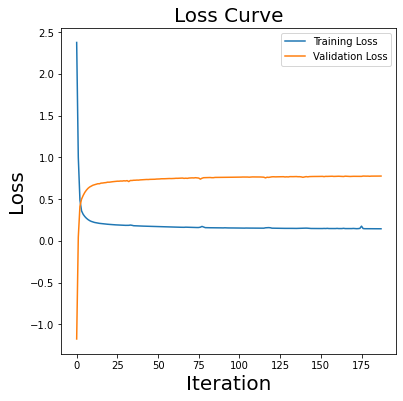

In [31]:
#Visualise loss curve
train_loss = pipeline['mlp'].loss_curve_
val_loss = pipeline['mlp'].validation_scores_


# Plot the loss curves
plt.figure(figsize=(6,6))
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Loss',fontsize=20)
#plt.savefig('loss1.png')
plt.legend()
plt.show()


In [ ]:
#prediction
#y_pred = model.predict(X_test)
#score = mean_squared_error(y_test,y_pred)

#print('test  score:',score)

In [32]:
#Calculate SHAP values
X_test_sample= shap.sample(X_test,800)
explainer = shap.KernelExplainer(model.predict,X_test_sample)
shap_values_test = explainer.shap_values(X_test_sample)


Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/800 [00:00<?, ?it/s]

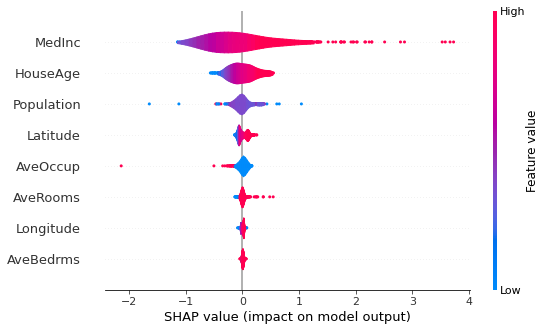

In [53]:
shap.summary_plot(shap_values_test, X_test_sample,feature_names=feature_names,plot_type='violin')

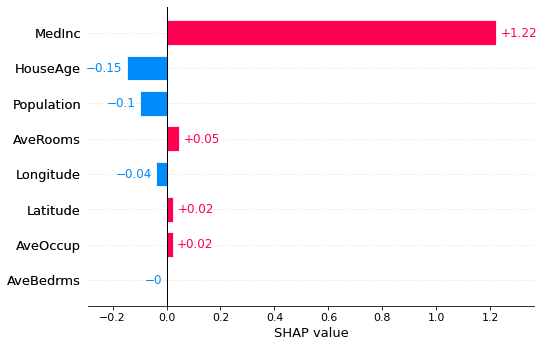

In [57]:
# local bar plot of single prediction 
shap_explanation = shap.Explanation(values=shap_values_test[100], feature_names=feature_names)
shap.plots.bar(shap_explanation)